<a href="https://colab.research.google.com/github/mshily/hse-homeworks/blob/main/linear-algebra-lab-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Линейная алгебра. Лабораторная работа 1, зима 2025, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

**И всё-таки задание**

А сейчас мы в качестве примера создадим единичную матрицу:

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
Z = np.zeros ((3, 4))
print (Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
M = np.diag ([1, 2, 3, 4, 5])
print (M)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
print (M.trace())

15


In [ ]:
print (sla.inv(M))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [ ]:
X = np.random.rand (4, 5)
print (X)

[[0.56930817 0.92640295 0.29028608 0.5608664  0.73360366]
 [0.12554504 0.77014701 0.79372037 0.16158484 0.91287494]
 [0.52139633 0.58851265 0.07639057 0.32484279 0.70356209]
 [0.51422121 0.64937511 0.86577154 0.85803128 0.01322034]]


In [ ]:
print(sla.det(X[np.ix_([1, 2], [0, 1])]))

-0.32766698242670733


In [ ]:
print (np.dot(X.T, X))

[[0.87615093 1.26486769 0.74993774 0.95018172 0.90588635]
 [1.26486769 2.219384   1.48737055 1.39239061 1.80530065]
 [0.74993774 1.48737055 1.46965391 1.05873887 1.00271367]
 [0.95018172 1.39239061 1.05873887 1.18242129 0.79885093]
 [0.90588635 1.80530065 1.00271367 0.79885093 1.86668937]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    # Your code here

    if X.shape[0] != X.shape[1]:
        raise ValueError

    Y = X.copy()
    n = X.shape[1]
    det = 1


    for j in range (0, n):
        found = False
        for i in range(j, n):
            if Y[i][j] != 0:
                if i != j:
                    det *= -1
                    Y[[i, j]] = Y[[j, i]]

                det = det * Y[j][j]
                Y[j] = Y[j] / Y[j][j]

                for k in range (j + 1, n):
                    Y[k] = Y[k] - Y[j] * Y[k][j]
                found = True

        if found == False:
            return 0

    return det

Простая проверка:

In [ ]:
# Запустите этот блок кода
X = np.array([[0,0,0], [0,1,0], [0,0,1]])
print(X)
print(my_det(X))

X = np.array([[1,0,0], [0,1,0], [0,0,1]])
print(X)
print(my_det(X))

X = np.array([[0,0, 1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 0]
 [0 1 0]
 [0 0 1]]
0
[[1 0 0]
 [0 1 0]
 [0 0 1]]
1
[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [ ]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

49.5 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
569 µs ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
471 µs ± 118 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
71.8 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
92.1 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


/tmp/ipython-input-11-2526992178.py:31: RuntimeWarning: overflow encountered in scalar multiply
  det = det * Y[j][j]


2.46 s ± 381 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


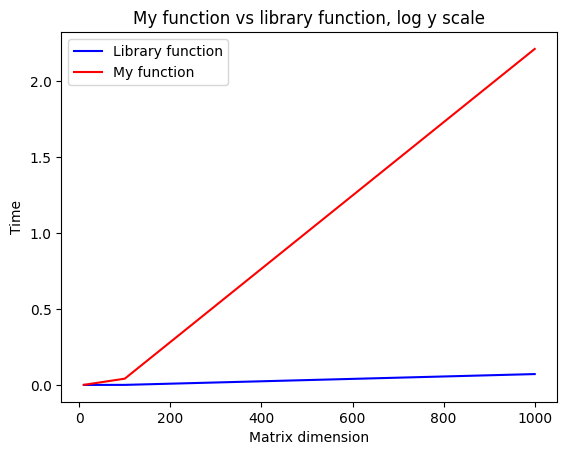

In [ ]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

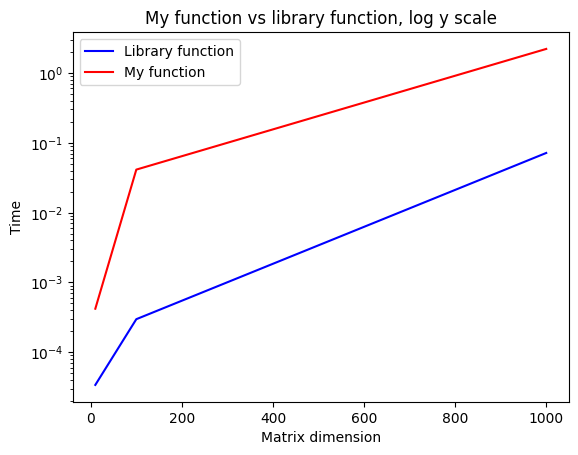

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
print(np.dot(np.array([[1, 0], [10**20, 1]]), np.array([[10**(-20), 1], [0, 1 - 10**20]])))

[[1e-20 1]
 [1.0 1]]


In [ ]:
print(np.dot(np.array([[1., 0.], [10.**20, 1.]]), np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])))

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

Первый

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [ ]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    C = np.zeros((2 * dim + 1, 2 * dim + 1))

    for i in range (2 * dim):
        C[i][0] = 1

    for i in range (1, 2 * dim + 1):
        for j in range (1, i + 1):
            C[i][j] = C[i - 1][j] + C[i - 1][j - 1]

    for i in range (dim):
        for j in range (dim):
            P[i][j] = C[i + j][i]

    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Давайте из n-ой строки вычтем (n - 1)-ую, из (n - 1)-ой (n - 2)-ую и так далее до 2-ой. Так как $C^k_n=C^k_{n-1}+C^{k-1}_{n-1}$, то после одной такой операции на всех строках вместо $C^i_{i+j}$ будет стоять $C^{i}_{i+j-1}$, то есть каждая строка сдвинется влево и вдобавок появятся 0. Также сохранятся свойства биномиальных коеффициентов и для следующих операций все также будет коррекно. Полуичли верхнетреугольную матрицу с единицами на диагонали, её опередлитель 1 и так как определитель матрицы при вычитании одной строки из другой не изменяется, то определитель нашей матрицы также равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [ ]:
print(sla.det(my_pascal(5)))
print(sla.det(my_pascal(7)))
print(sla.det(my_pascal(10)))
print(sla.det(my_pascal(30)))

1.0
1.0000000000006537
0.99999999821627
-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
def prod_and_sq_sum(A):
    return np.prod(A.diagonal()), np.sum(np.square(A.diagonal()))

In [ ]:
print (prod_and_sq_sum(A))

(np.int64(45), np.int64(107))


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}a_ib_i^T$$

In [ ]:
A1 = np.array ([[1, 2]])
B1 = np.array ([[2, 3]])

In [ ]:
def f(A, B, k):
    r = min(k, A.shape[1])
    return np.dot(A[:, :r], B[:, :r].T)

In [ ]:
print (f(A1, B1, 1))
print (f(A1, B1, 2))

[[2]]
[[8]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[42, 5, 62], [426, -5, 62], [71, 82, 9]])

A1 = np.array ([[1, 2], [2, 3]])
B1 = np.array ([[1, 0], [0, 1]])

In [ ]:
def get_diag(A, B):
    return np.sum(A * B.T, axis=1)


In [ ]:
print (get_diag(A, B))
print (get_diag(A1, B1))
print (np.dot(A1, B1))
print (np.dot(A, B))


[1107  487 1011]
[1 3]
[[1 2]
 [2 3]]
[[1107  241  213]
 [2724  487  612]
 [4341  733 1011]]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [ ]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = x - a
    v *= coef
    v *= (np.cos(angle) + np.sin(angle) * 1j)
    return v + a

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return (shrink_rotate (x, a, coef, angle) - a).conjugate() + a

def geometric_inverse(x, a, r):
    if x == a: # не понятно, что такое инверсия когда x = a
        raise ValueError


    l = r**2 / (np.abs(x - a)**2)
    x1 = a + l * (x - a)
    return x1


In [ ]:
# Стресс тесты для функций выше

def correct_shrink_rotate(x, a, coef=1., angle=0.):
  return (a + (x - a) * coef * (np.cos(angle) + np.sin(angle) * 1j))

def correct_shrink_rotate_conj(x, a, coef=1., angle=0.):
  return (a + np.conj((x - a) * coef * (np.cos(angle) + np.sin(angle) * 1j)))

def correct_geometric_inverse(x, a, r):
  return a + np.conj((r ** 2) / (x - a))

TESTS = 100
RANGE = 10
shrink_rotate_cnt = 0
shrink_rotate_conj_cnt = 0
geometric_inverse_cnt = 0
for i in range(TESTS):
  x = np.random.uniform(-RANGE, RANGE) + 1j * np.random.uniform(-RANGE, RANGE)
  a = np.random.uniform(-RANGE, RANGE) + 1j * np.random.uniform(-RANGE, RANGE)
  coef = np.random.uniform(-RANGE, RANGE)
  angle = np.random.uniform(0, 2) * np.pi
  r = np.random.uniform(1, RANGE)

  example = shrink_rotate(x, a, coef, angle)
  ans = correct_shrink_rotate(x, a, coef, angle)
  if (abs(example.real - ans.real) < 1e-6 and abs(example.imag - ans.imag) < 1e-6):
    shrink_rotate_cnt += 1
  else:
    print("shrink_rotate failed")

  example = shrink_rotate_conj(x, a, coef, angle)
  ans = correct_shrink_rotate_conj(x, a, coef, angle)
  if (abs(example.real - ans.real) < 1e-6 and abs(example.imag - ans.imag) < 1e-6):
    shrink_rotate_conj_cnt += 1
  else:
    print("shrink_rotate_conj failed")

  example = geometric_inverse(x, a, r)
  ans = correct_geometric_inverse(x, a, r)
  if (abs(example.real - ans.real) < 1e-6 and abs(example.imag - ans.imag) < 1e-6):
    geometric_inverse_cnt += 1
  else:
    print("geometric_inverse failed")

if (shrink_rotate_cnt == TESTS):
  print("shrink_rotate passed")
if (shrink_rotate_conj_cnt == TESTS):
  print("shrink_rotate_conj passed")
if (geometric_inverse_cnt == TESTS):
  print("geometric_inverse passed")


# Чекер
for _ in range(10):
  A = np.random.randn(8, 8)
  true_prod = np.prod(np.diag(A))
  true_sq_sum = np.sum(np.diag(A) ** 2)
  prod, sq_sum = prod_and_sq_sum(A)
  if np.abs(true_prod - prod) > 1e-6 or np.abs(true_sq_sum - sq_sum) > 1e-6:
    print("failed", 1)
print("passed")



# Чекер

for _ in range(10):
    A = np.random.rand(8, 8)
    B = np.random.rand(8, 8)
    k = np.random.randint(1, 5)
    true_res = A[:,:k].dot(B.T[:k,:])
    res = f(A=A, B=B, k=k)
    if sla.norm(true_res - res) > 1e-6:
        print("failed", 2)
print("passed")


#чекер
for _ in range(10):
  A = np.random.rand(8, 8)
  B = np.random.rand(8, 8)
  true_res = (A * B.T).sum(axis=1)
  res = get_diag(A,B)
  if sla.norm(true_res - res) > 1e-6:
    print("failed", 3)
print("passed")


shrink_rotate passed
shrink_rotate_conj passed
geometric_inverse passed
passed
passed
passed


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

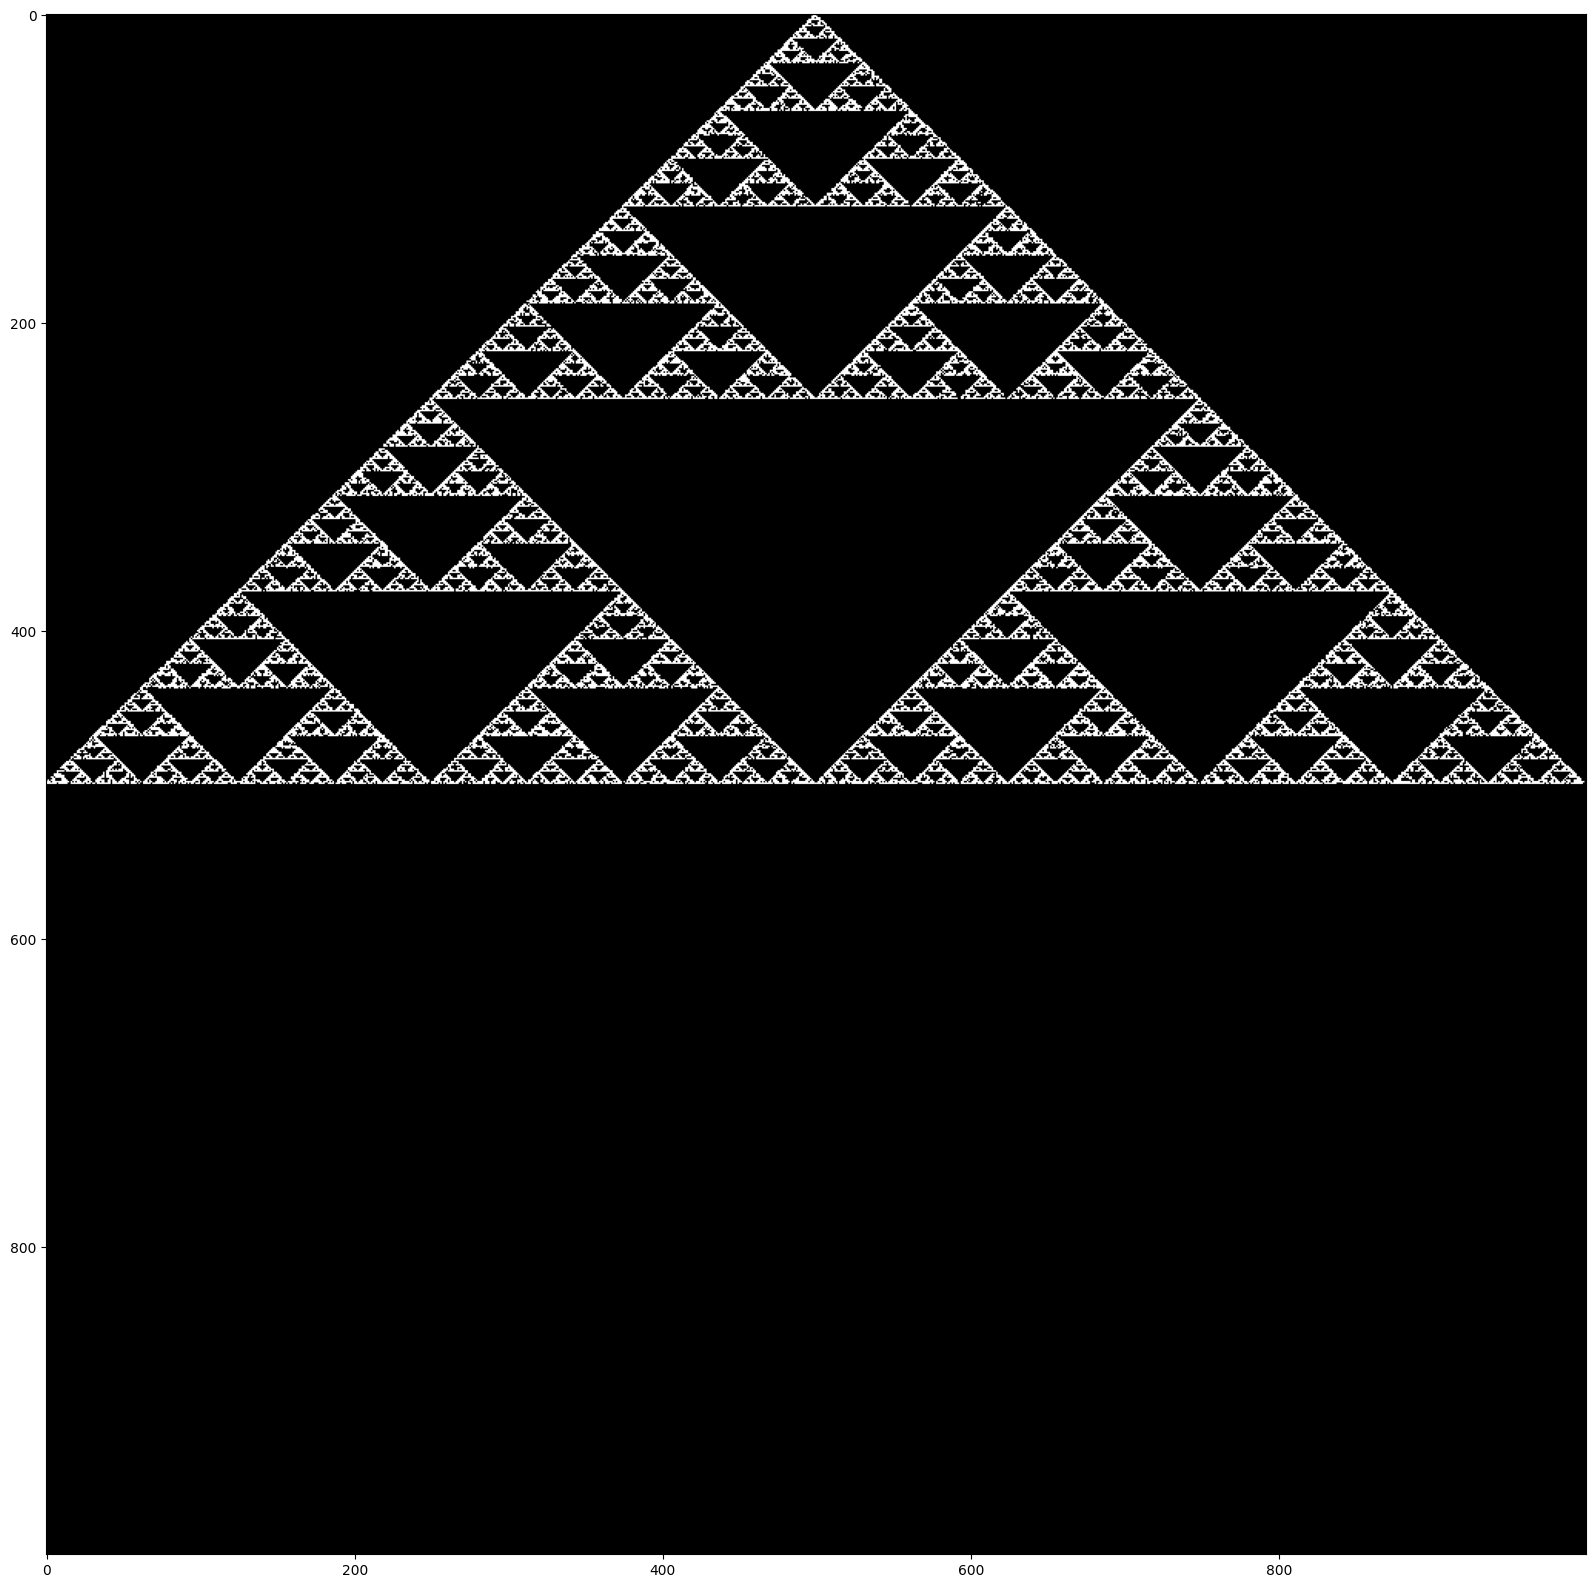

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

image = np.zeros((1000, 1000))
image_size = 1000
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        x, y = z.real, z.imag

        if -1 <= x <= 1 and -1 <= y <= 1:
            col = int((x + 1) / 2 * (image_size - 1))
            row = int((1 - y) / 2 * (image_size - 1))

            image[row, col] = 1

plt.figure (figsize=(20, 20))
plt.imshow(image, cmap = 'gray')


**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

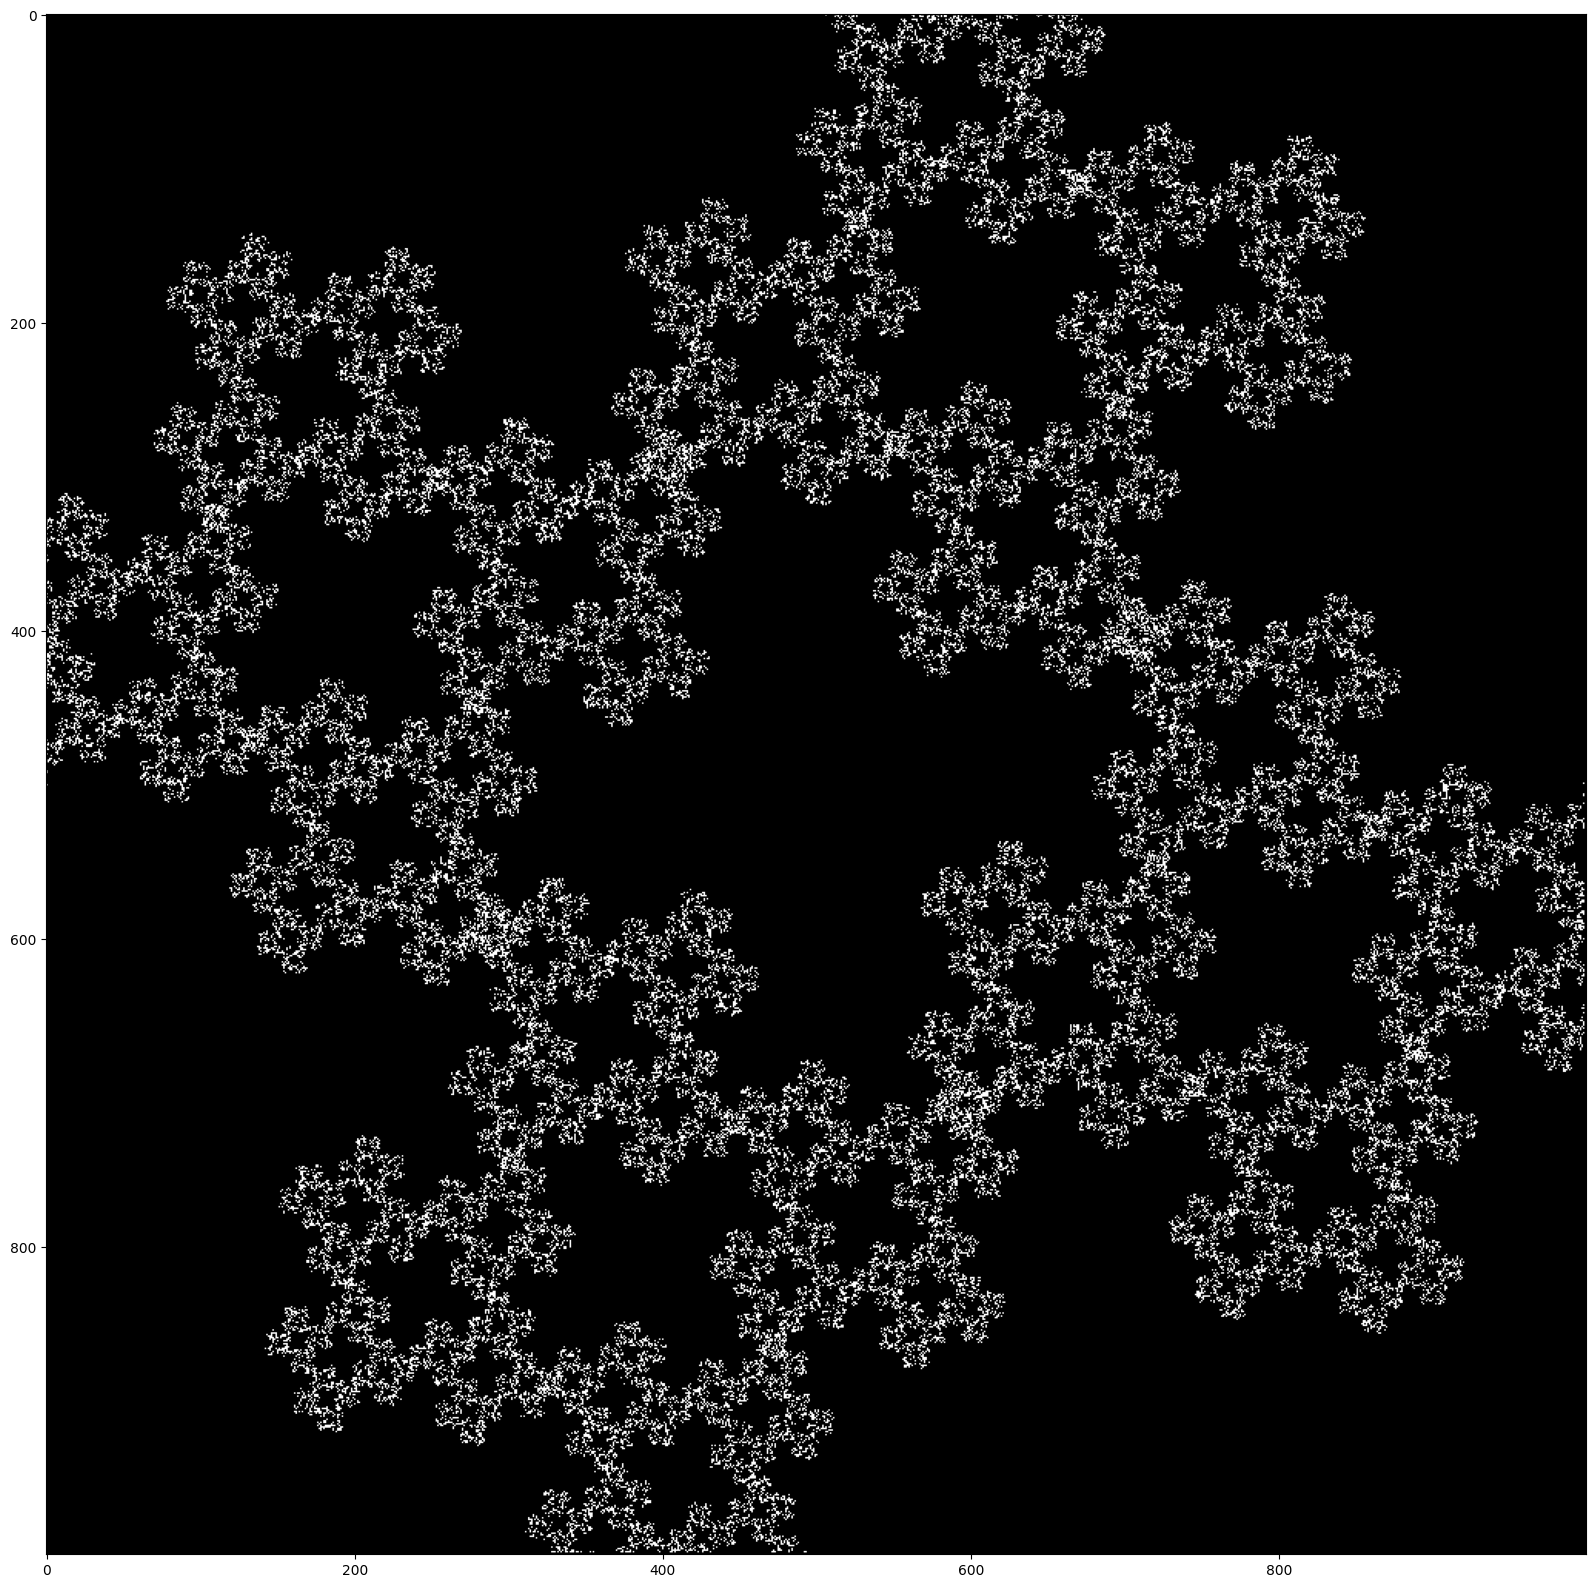

In [ ]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1*1j, coef=0.45, angle=np.pi / 6)),
    (lambda t: shrink_rotate(t, 1 + 0*1j, coef=0.45, angle=np.pi / 6)),
    (lambda t: shrink_rotate(t, -1 + 0*1j, coef=0.45, angle=np.pi / 6)),
    (lambda t: shrink_rotate(t, 0 - 1*1j, coef=0.45, angle=np.pi / 6))
]

image = np.zeros((1000, 1000))
image_size = 1000
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        x, y = z.real, z.imag

        if -1 <= x <= 1 and -1 <= y <= 1:
            col = int((x + 1) / 2 * (image_size - 1))
            row = int((1 - y) / 2 * (image_size - 1))

            image[row, col] = 1

plt.figure (figsize=(20, 20))
plt.imshow(image, cmap = 'gray')


## Часть 6. Функции от матриц

### Пусть $A$ -- некоторая квадратная матрица.

В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать разными способами. Ниже мы покажем два из них, один символьный и один численный.

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 241:

`A = Matrix([[4,4,4,1],[5,7,6,2],[-8,-6,-6,-3],[-1,-6,-5,1]])`

- у группы 242:

`A = Matrix([[-1,1,1,1],[-3,2,1,2],[-2,3,3,-2],[-2,1,1,2]])`

- у группы 243:

`A = Matrix([[2,1,-3,-2],[1,2,2,1],[2,-2,8,3],[-2,4,-8,-2]])`

- у группы 244:

`A = Matrix([[-3,3,-2,1],[-7,6,-5,4],[-2,1,-4,6],[-2,1,-5,7]])`

- у группы 245:

`A = Matrix([[4,3,3,1],[-7,-7,-8,-3],[2,3,5,1],[6,7,6,4]])`

В этом задании надо пользоваться [библиотекой](https://www.sympy.org/) `sympy` для символьных вычислений. Вам понадобятся:
- [sympy.symbol](https://docs.sympy.org/latest/modules/core.html#module-sympy.core.symbol) для генерации буквенных выражений.
- Для работы с многочленами смотреть [сюда](https://docs.sympy.org/latest/modules/polys/basics.html#polynomials).
- Для работы с символьными матрицами [сюда](https://docs.sympy.org/latest/modules/matrices/index.html).

Посчитайте указанным способом (все вычисления должны быть символьными):


1) $B = e^A$.

2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. Но я настоятельно рекомендую использовать `sympy`.

In [ ]:
from sympy import Matrix, simplify
import sympy as sp

x = sp.symbols('x')

#hermite interpolation
#=======================================================================================

class NewtonDerivativePoly:
    def __init__(self, phi, nodes: np.ndarray, values: np.ndarray):
        self.phi = phi
        self.nodes = nodes
        self.values = values
        self.coeffs = self._divided_differences()

    def _divided_differences(self) -> np.ndarray:
        n = len (self.nodes)
        div_table = np.zeros ((n, n), dtype=object)

        for i in range (n):
            div_table[i, 0] = self.values[i]

        for j in range (1, n):
            for i in range (n - j):
                if self.nodes[i + j] == self.nodes[i]:
                    div_table[i, j] = sp.diff(self.phi, (x, j)).subs(x, self.nodes[i]) / sp.factorial(j)
                else:
                    div_table[i, j] = (div_table[i + 1, j - 1] - div_table[i, j - 1]) / (self.nodes[i + j] - self.nodes[i])

        coeffs = div_table[0, :]
        return coeffs

    def get_polynom (self, var):
        n = len(self.coeffs)
        poly_expr = 0
        poly_fact = 1
        for j in range (n):
            poly_expr = poly_expr + poly_fact * self.coeffs[j]
            if j < n - 1:
                poly_fact = poly_fact * (var - self.nodes[j])

        return poly_expr

    def get_value_matrix (self, A: Matrix):
        g_expr = self.get_polynom(x)
        poly = sp.Poly(g_expr, x)

        coeffs = poly.all_coeffs()
        deg = poly.degree()

        res = sp.zeros(*A.shape)

        for i, c in enumerate (coeffs):
            power = deg - i
            res += c * (A**power)
        return simplify(res)
#=======================================================================================

#calculate support values for interpolation
#=======================================================================================
def precalculate_support_values (phi, roots):
    node_list = []
    value_list = []

    for lam, deg in roots:
        for d in range (deg):
            node_list.append (lam)

            val = phi.subs(x, lam)
            value_list.append (val)

    node_np = np.array (node_list, dtype = object)
    value_np = np.array (value_list, dtype = object)
    return node_np, value_np
#=======================================================================================


#solution
print("Matrix A:")
A = Matrix([[-1,1,1,1],[-3,2,1,2],[-2,3,3,-2],[-2,1,1,2]])
sp.pprint(A)
print()

#find char poly
f = A.charpoly(x)
sp.pprint(f.as_expr())
print()

#find decomposition as help of roots
decomp_start = sp.factor_list(f.as_expr())[1]
sp.pprint (decomp_start)

decomp = []
for root, deg in decomp_start:
    decomp.append((sp.solve(root, x)[0], deg))
print("roots:")
for root, deg in decomp:
    print("root =", root, "deg =", deg)
print()

Matrix A:
⎡-1  1  1  1 ⎤
⎢            ⎥
⎢-3  2  1  2 ⎥
⎢            ⎥
⎢-2  3  3  -2⎥
⎢            ⎥
⎣-2  1  1  2 ⎦

 4      3       2           
x  - 6⋅x  + 13⋅x  - 12⋅x + 4

[(x - 2, 2), (x - 1, 2)]
roots:
root = 2 deg = 2
root = 1 deg = 2



In [ ]:
#find matrixes B, S and T

set_phi = [sp.exp(x), sp.sin(x), sp.cos(x)]
list_phi = []
for phi in set_phi:
    func_name = phi.func.__name__

    nodes, values = precalculate_support_values(phi, decomp)

    poly = NewtonDerivativePoly(phi, nodes, values)

    g_expr = poly.get_polynom(x)
    print(f"Interpolating polynomial for {func_name}(x):")
    sp.pprint(g_expr)
    print()

    list_phi.append(poly.get_value_matrix(A))


Interpolating polynomial for exp(x):
       2         ⎛   2      ⎞            2            2    2
(x - 2) ⋅(x - 1)⋅⎝- ℯ  + 3⋅ℯ⎠ + ℯ⋅(x - 2)  + (x - 2)⋅ℯ  + ℯ 

Interpolating polynomial for sin(x):
       2                                                           2           ↪
(x - 2) ⋅(x - 1)⋅(-2⋅sin(2) + cos(2) + cos(1) + 2⋅sin(1)) + (x - 2) ⋅(-sin(2)  ↪

↪                                             
↪ + cos(2) + sin(1)) + (x - 2)⋅cos(2) + sin(2)

Interpolating polynomial for cos(x):
       2                                                           2           ↪
(x - 2) ⋅(x - 1)⋅(-sin(2) - sin(1) - 2⋅cos(2) + 2⋅cos(1)) + (x - 2) ⋅(-sin(2)  ↪

↪                                             
↪ - cos(2) + cos(1)) - (x - 2)⋅sin(2) + cos(2)



In [ ]:
B, S, T = list_phi

print("Matrix B(exp):")
sp.pprint(B)
print()


Matrix B(exp):
⎡    2              2      2           ⎤
⎢ - ℯ  - ℯ     ℯ + ℯ      ℯ       0    ⎥
⎢                                      ⎥
⎢                          2           ⎥
⎢ℯ⋅(-3 - ℯ)   ℯ⋅(2 + ℯ)   ℯ       ℯ    ⎥
⎢                                      ⎥
⎢                     2     2     2    ⎥
⎢ℯ⋅(2 - 3⋅ℯ)  -ℯ + 3⋅ℯ   2⋅ℯ   - ℯ  - ℯ⎥
⎢                                      ⎥
⎢                   2      2           ⎥
⎣ℯ⋅(-ℯ - 2)    ℯ + ℯ      ℯ       ℯ    ⎦



In [ ]:
print("Matrix S(sin):")
sp.pprint(S)
print()

Matrix S(sin):
⎡                                                                              ↪
⎢     -cos(1) - 2⋅cos(2) + sin(2)         -sin(2) + 2⋅cos(2) + sin(1)       co ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢-2⋅cos(1) - sin(1) - 2⋅cos(2) + sin(2)  -sin(2) + 2⋅cos(2) + 2⋅sin(1)      co ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                             ⎛π    ⎞                                          ↪
⎢  -sin(2) - 2⋅cos(2) + √2⋅sin⎜─ + 1⎟     -sin(1) + 2⋅cos(2) + sin(2)   cos(2) ↪
⎢                             ⎝4    ⎠                                          ↪
⎢                                                                              ↪
⎢         ⎛π 

In [ ]:
print("Matrix T(cos):")
sp.pprint(T)
print()

Matrix T(cos):
⎡                                                                              ↪
⎢      cos(2) + sin(1) + 2⋅sin(2)         -2⋅sin(2) - cos(2) + cos(1)       -s ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢-cos(1) + cos(2) + 2⋅sin(1) + 2⋅sin(2)  -2⋅sin(2) - cos(2) + 2⋅cos(1)      -s ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢        ⎛π    ⎞                                                               ↪
⎢  √2⋅cos⎜─ + 1⎟ - cos(2) + 2⋅sin(2)      -2⋅sin(2) - cos(1) + cos(2)   -sin(2 ↪
⎢        ⎝4    ⎠                                                               ↪
⎢                                                                              ↪
⎢            

In [ ]:
#check S^2 + T^2 == E

lhs = sp.simplify(S**2 + T**2)
E = np.eye(A.shape[0])
diff_sincos = simplify(lhs - E)
print("(S^2 + T^2) =")
sp.pprint(lhs.evalf())
print()

(S^2 + T^2) =
⎡1.0   0    0    0 ⎤
⎢                  ⎥
⎢ 0   1.0   0    0 ⎥
⎢                  ⎥
⎢ 0    0   1.0   0 ⎥
⎢                  ⎥
⎣ 0    0    0   1.0⎦



Видно, что матрица равна E.

In [ ]:
f = B.charpoly(x)
sp.pprint(f.as_expr())
print()

#find decomposition as help of roots
decomp_start = sp.factor_list(f.as_expr())[1]
sp.pprint (decomp_start)

decomp = []
for root, deg in decomp_start:
    decomp.append((sp.solve(root, x)[0], deg))
print("roots:")
for root, deg in decomp:
    print("root =", root, "deg =", deg)
print()

 4    3 ⎛     2      ⎞    2 ⎛ 2    4      3⎞     ⎛     5      4⎞    6
x  + x ⋅⎝- 2⋅ℯ  - 2⋅ℯ⎠ + x ⋅⎝ℯ  + ℯ  + 4⋅ℯ ⎠ + x⋅⎝- 2⋅ℯ  - 2⋅ℯ ⎠ + ℯ 

⎡            ⎛     2   ⎞⎤
⎣(x - ℯ, 2), ⎝x - ℯ , 2⎠⎦
roots:
root = E deg = 2
root = exp(2) deg = 2



In [ ]:
#find matrixes B, S and T

phi = sp.ln(x)
func_name = phi.func.__name__

nodes, values = precalculate_support_values(phi, decomp)

poly = NewtonDerivativePoly(phi, nodes, values)

g_expr = poly.get_polynom(x)
print(f"Interpolating polynomial for {func_name}(x):")
sp.pprint(g_expr)
print()


Interpolating polynomial for log(x):
                  ⎛     1       -2      -1      1   ⎞                          ↪
                  ⎜- ─────── + ℯ     - ℯ   + ───────⎟                          ↪
                  ⎜        2                       2⎟                          ↪
       2 ⎛     2⎞ ⎜  -ℯ + ℯ                  -ℯ + ℯ ⎟          2 ⎛   -1      1 ↪
(x - ℯ) ⋅⎝x - ℯ ⎠⋅⎜─────────────── - ───────────────⎟   (x - ℯ) ⋅⎜- ℯ   + ──── ↪
                  ⎜          2                 2    ⎟            ⎜             ↪
                  ⎝    -ℯ + ℯ            -ℯ + ℯ     ⎠            ⎝        -ℯ + ↪
───────────────────────────────────────────────────── + ────────────────────── ↪
                             2                                         2       ↪
                       -ℯ + ℯ                                    -ℯ + ℯ        ↪

↪                       
↪                       
↪                       
↪    ⎞                  
↪ ───⎟                  
↪   2⎟                  
↪ 

In [ ]:

B_new = poly.get_value_matrix(B)
print("Matrix A:")
sp.pprint(A)
print()
print ("Matrix ln(B):")
sp.pprint(B_new)
print()

Matrix A:
⎡-1  1  1  1 ⎤
⎢            ⎥
⎢-3  2  1  2 ⎥
⎢            ⎥
⎢-2  3  3  -2⎥
⎢            ⎥
⎣-2  1  1  2 ⎦

Matrix ln(B):
⎡-1  1  1  1 ⎤
⎢            ⎥
⎢-3  2  1  2 ⎥
⎢            ⎥
⎢-2  3  3  -2⎥
⎢            ⎥
⎣-2  1  1  2 ⎦



Теперь попробуем поиграться с матрицами по-другому. В этом задании уже требуется работать с матрицами численно. Для этого используйте `numpy` или `scipy`.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [ ]:
A = Matrix([[-1, 1, 1, 1], [-3, 2, 1, 2], [-2, 3, 3, -2], [-2, 1, 1, 2]])
print("Matrix A:")
sp.pprint(A)
print()

def exp_tay(A, tol=1e-10):
    n = A.shape[0]
    S = np.eye(n)
    c = np.eye(n)
    k = 0
    while np.max(np.abs(c)) > tol:
        k += 1
        c = A @ c / k
        S = S + c
    return S

def sin_tay(A, tol=1e-10):
    n = A.shape[0]
    T = A.copy()
    S = T.copy()
    k = 0
    while np.max(np.abs(T)) > tol:
        k += 1
        T = T @ (A @ A) / ((2*k) * (2*k + 1))
        c = ((-1)**k) * T
        S = S + c
    return S

def cos_tay(A, tol=1e-10):
    n = A.shape[0]
    U = np.eye(n)
    S = U.copy()
    k = 0
    while np.max(np.abs(U)) > tol:
        k += 1
        U = U @ (A @ A) / ((2*k - 1) * (2*k))
        c = ((-1)**k) * U
        S = S + c
    return S

expA = exp_tay(A, tol=1e-10)
print("\ne^A by Taylor:")
sp.pprint(expA)

B = A.exp()
print("\ne^A computed by sympy:")
sp.pprint(B.evalf())

if np.max(np.abs(expA - B)) < 1e-10:
    print("\nCORRECT!")
else:
    print("\nINCORRECT!")

Matrix A:
⎡-1  1  1  1 ⎤
⎢            ⎥
⎢-3  2  1  2 ⎥
⎢            ⎥
⎢-2  3  3  -2⎥
⎢            ⎥
⎣-2  1  1  2 ⎦


e^A by Taylor:
⎡-10.1073379273806  10.1073379273806  7.38905609892586  4.30995320891336e-12⎤
⎢                                                                           ⎥
⎢-15.5439015842987  12.8256197558396  7.38905609892586    2.71828182846335  ⎥
⎢                                                                           ⎥
⎢-16.7306046398638  19.4488864683229  14.778112197856    -10.1073379273849  ⎥
⎢                                                                           ⎥
⎣-12.8256197558396  10.1073379273806  7.38905609892586    2.71828182846336  ⎦

e^A computed by sympy:
⎡-10.1073379273897  10.1073379273897  7.38905609893065          0        ⎤
⎢                                                                        ⎥
⎢-15.5439015843078  12.8256197558487  7.38905609893065  2.71828182845905 ⎥
⎢                                                                        

In [ ]:
np.random.seed(325)
A = np.random.rand(10, 10)

sinA = sin_tay(A, tol=1e-10)
cosA = cos_tay(A, tol=1e-10)

ST = sinA @ sinA + cosA @ cosA
E = np.eye(10)

print("\nsin^2(A) + cos^2(A):")
print(ST)

diff = ST - E

if np.max(np.abs(diff)) < 1e-10:
    print("\nCORRECT!")
else:
    print("\nINCORRECT!")


sin^2(A) + cos^2(A):
[[ 1.00000000e+00 -5.45036238e-13 -4.37122560e-13 -6.29218899e-13
  -4.79921658e-13 -5.68795011e-13 -6.18498308e-13 -5.60301805e-13
  -7.72132358e-13 -4.82523743e-13]
 [-4.49029702e-13  1.00000000e+00 -3.22842447e-13 -4.68000638e-13
  -3.53411744e-13 -4.21745971e-13 -4.63962202e-13 -4.17638146e-13
  -5.72082312e-13 -3.58116314e-13]
 [-6.02573547e-13 -5.49227330e-13  1.00000000e+00 -6.34145514e-13
  -4.83446616e-13 -5.74726031e-13 -6.25145768e-13 -5.67434988e-13
  -7.75740583e-13 -4.87165863e-13]
 [-5.29645772e-13 -4.78589390e-13 -3.84497989e-13  1.00000000e+00
  -4.21510483e-13 -4.99517094e-13 -5.49914281e-13 -4.96214181e-13
  -6.80067114e-13 -4.23466817e-13]
 [-3.61821684e-13 -3.31229835e-13 -2.63455924e-13 -3.81333853e-13
   1.00000000e+00 -3.46889184e-13 -3.77253784e-13 -3.39728246e-13
  -4.67653694e-13 -2.92293967e-13]
 [-2.69895217e-13 -2.44776421e-13 -1.94594341e-13 -2.83818108e-13
  -2.14106510e-13  1.00000000e+00 -2.78110868e-13 -2.52187160e-13
  -3.452915

В каждом случае вывело CORRECT! следовательно все корректно

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.